In [67]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import lxml
import yfinance as yf

In [68]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [69]:
url = "https://companiesmarketcap.com/tesla/revenue/"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])
print(soup.prettify)


<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en-US"><head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180

In [70]:
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Annual revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue']) 
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""] 
tesla_revenue.tail(5)

,Date,Revenue


In [71]:
gamestop = yf.Ticker('GME')
gamestock = gamestop.history(period='max')
gamestock.reset_index(inplace=True)
gamestock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [72]:
url = "https://companiesmarketcap.com/gamestop/revenue/"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Annual revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
gme_revenue.tail(5)

,Date,Revenue


Text(0.5, 1.0, 'Tesla Volume over years')

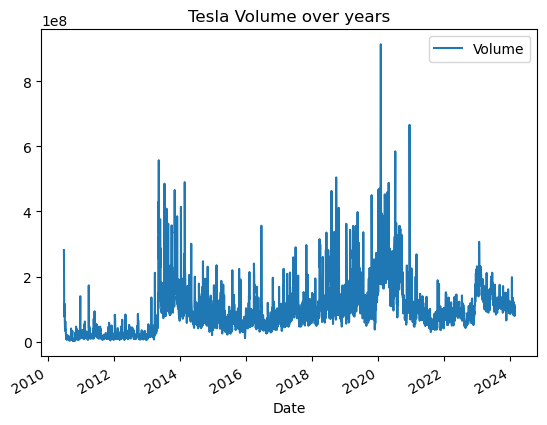

In [73]:

tesla_data.plot(x="Date", y="Volume")
plt.title("Tesla Volume over years")

Text(0.5, 1.0, 'Tesla Stock price over years')

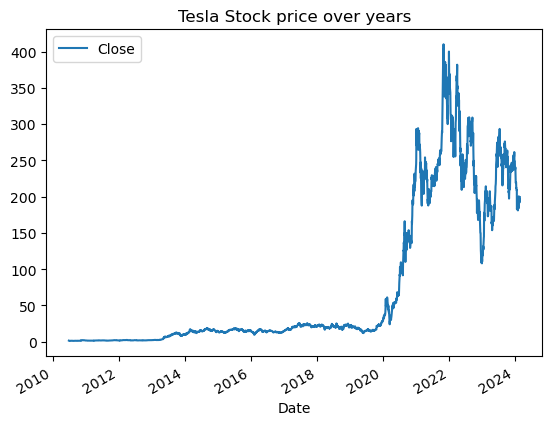

In [74]:
tesla_data.plot(x="Date", y="Close")
plt.title('Tesla Stock price over years')

Text(0.5, 1.0, 'Gamestop Volume over years')

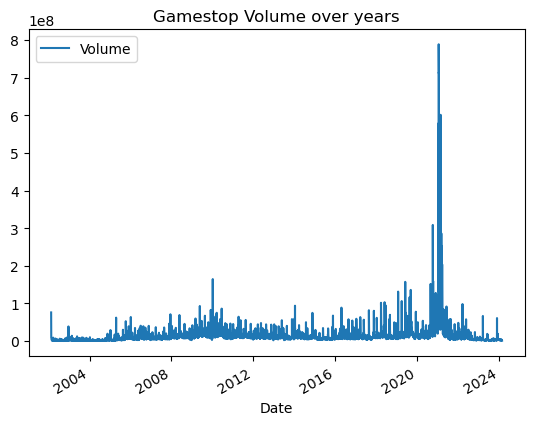

In [75]:
gamestock.plot(x="Date", y="Volume")
plt.title('Gamestop Volume over years')

Text(0.5, 1.0, 'Gamestop stock price over years')

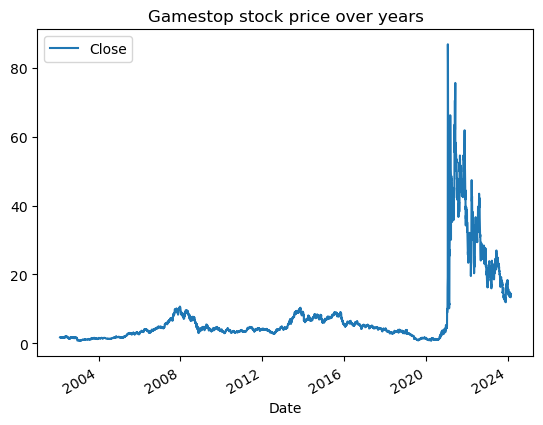

In [76]:
gamestock.plot(x="Date", y="Close")
plt.title('Gamestop stock price over years')